In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm
%matplotlib widget
plt.ioff()

In [2]:
name= "erosions/erosion 2025-02-03 15:50.npz"

data = np.load(name, allow_pickle=True)

hm_states = data['hm_states']
param = data["param"]

In [3]:
IS_3D = True

In [4]:
# Determine normalization parameters for colormap
min_value = min([hm[0].min() for hm in hm_states])
max_value = max([hm[0].max() for hm in hm_states]) / 10
center_value = (min_value + max_value) / 2
norm = TwoSlopeNorm(vmin=min_value, vcenter=center_value, vmax=max_value)
cmap = "coolwarm"

# Generate x and y axis values
y = np.arange(hm_states[0,0].shape[0])
x = np.arange(hm_states[0,0].shape[1])
x_meshed, y_meshed = np.meshgrid(x, y)

# Create figure
fig = plt.figure()
if IS_3D:
    ax = fig.add_subplot(111, projection='3d') 
    color_axis = ax.plot_surface(x_meshed, y_meshed, hm_states[0,0], cmap=cmap, norm=norm)
    ax.set_zlim(min_value, max_value)
else:
    ax = fig.add_subplot(111)
    color_axis = ax.matshow(hm_states[0,0], cmap='coolwarm')

# Add color bar
plt.colorbar(color_axis)

# Function to update the image for each frame
def update(frame):
    global color_axis
    if IS_3D:
        color_axis.remove()
        color_axis = ax.plot_surface(x_meshed, y_meshed, hm_states[frame,0], cmap=cmap, norm=norm)
    else:
        color_axis.set_data(hm_states[frame,0])
    return color_axis

# Create animation
animation = FuncAnimation(
    fig, update, frames=len(hm_states), interval=100, blit=True
)

# Save the animation
animation.save(f"{name}.mp4", writer='ffmpeg', fps=10)  # Save as MP4
# animation.save('data/height_map_animation.gif', writer='imagemagick', fps=10)  # Save as GIF


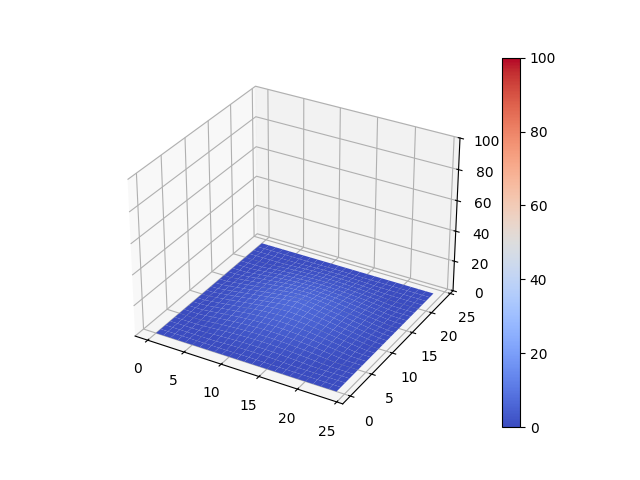

In [5]:
plt.show()